# [2b] OpenCVスタートアップ課題+フレームワークを使わない深層学習課題
## 1.カラー画像を白黒画像に変換しましょう． 

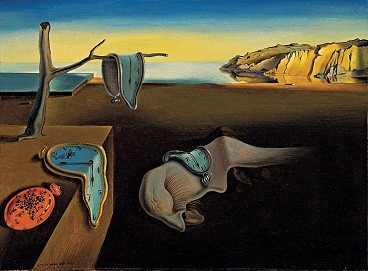

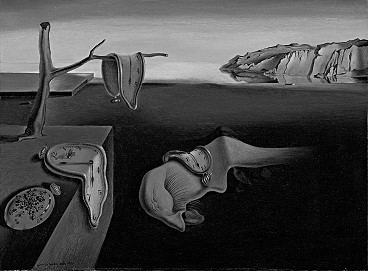

(271, 368, 3)


In [2]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import Image, display
# imshow()メソッドで，画像を簡便に呼び出せるようにする
def imshow(img):
    '''画像を Notebook 上にインラインで表示する。
    '''
    img = cv2.imencode('.png', img)[1]
    display(Image(img))
    
# ここから
img = cv2.imread("./img/dali.jpg", cv2.IMREAD_COLOR) # 画像読み込み
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
imshow(img) # 元画像

gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # カラーから白黒に変換
# plt.imshow(gray_img)
imshow(gray_img) # グレースケール画像

print(img.shape)

## 2.平滑化
平滑化は，深層学習のデータ拡張に使えますので，勉強しておきましょう．
フィルタリングによる平滑化 についても勉強しておきましょう． 
### Gaussian filter, Median filter, Bilateral filterを試してみてください． 
特に， バイラテラルフィルタは，エッジをぼかさず，近隣画素と差分が小さい領域 のみをぼかすフィルタで，「美肌フィルタ」として使われます．人の顔に試してみましょう． 

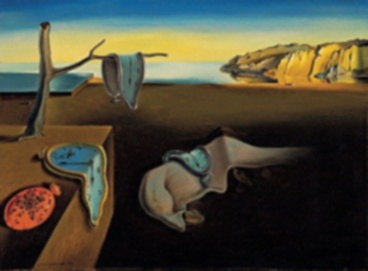

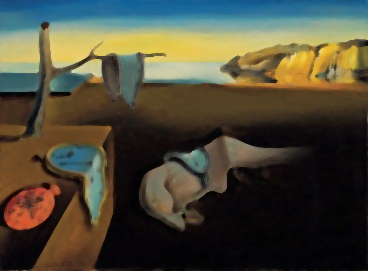

In [3]:
# ガウシアンフィルタ
# カーネルの縦幅と横幅(どちらも奇数)に加え，
# ガウシアンの標準偏差値sigmaX(横方向)とsigmaY(縦方向)を指定する必要があります．
# sigmaXしか指定されなければ，sigmaYはsigmaXと同じだとみなされます．
# どちらの値も0にした場合，カーネルのサイズから自動的に計算されます．
# ガウシアンフィルタは白色雑音の除去に適しています．
img = cv2.imread("./img/dali.jpg", cv2.IMREAD_COLOR) # 画像読み込み
blur = cv2.GaussianBlur(img,(5,5),0)
imshow(blur)

# メディアンフィルタ
# 箱型フィルタとガウシアンフィルタの出力結果は原画像中には存在しない画素値を出力とするのに対して，
# 中央値フィルタの出力は常に原画像中から選ばれています．
# そのためごま塩ノイズのような特異なノイズに対して効果的です．
# カーネルサイズは奇数でなければいけません．
img = cv2.imread("./img/dali.jpg", cv2.IMREAD_COLOR) # 画像読み込み
median = cv2.medianBlur(img,5)
imshow(median)


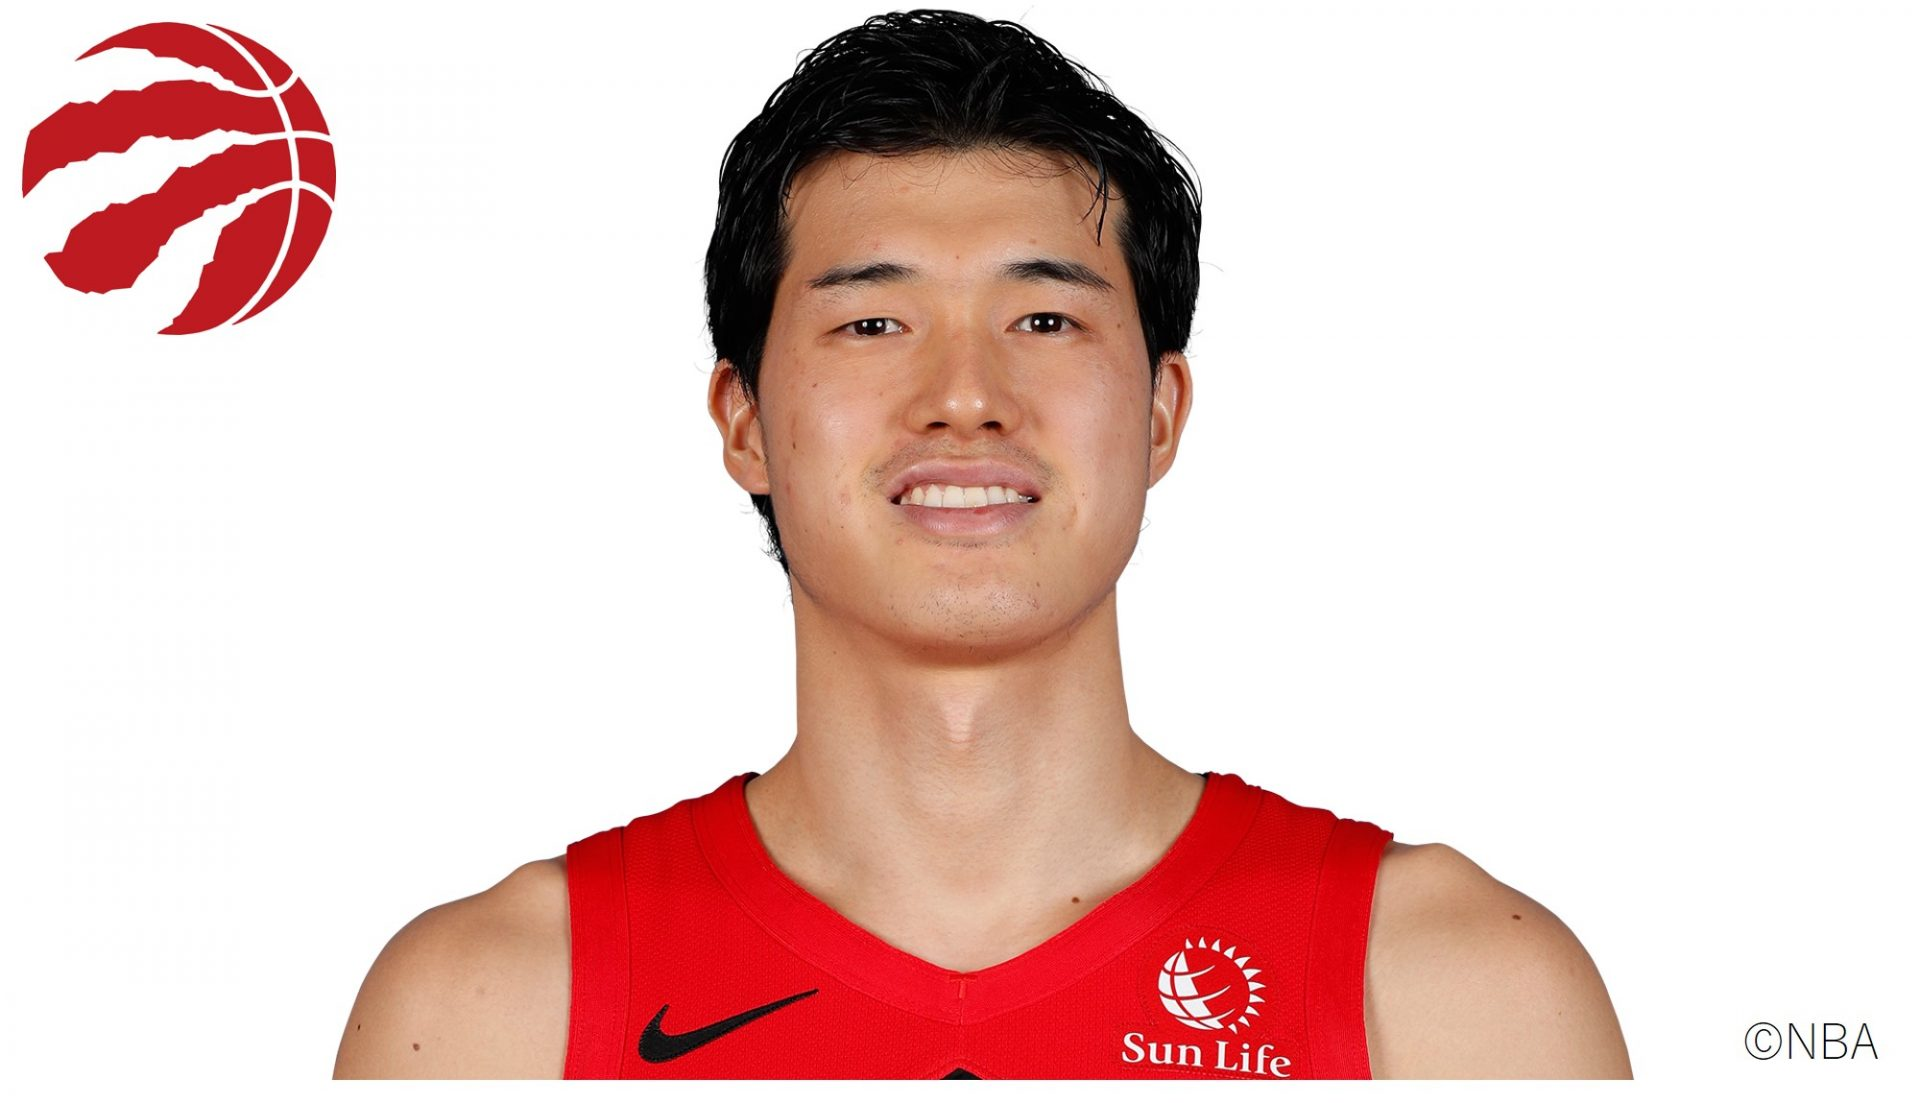

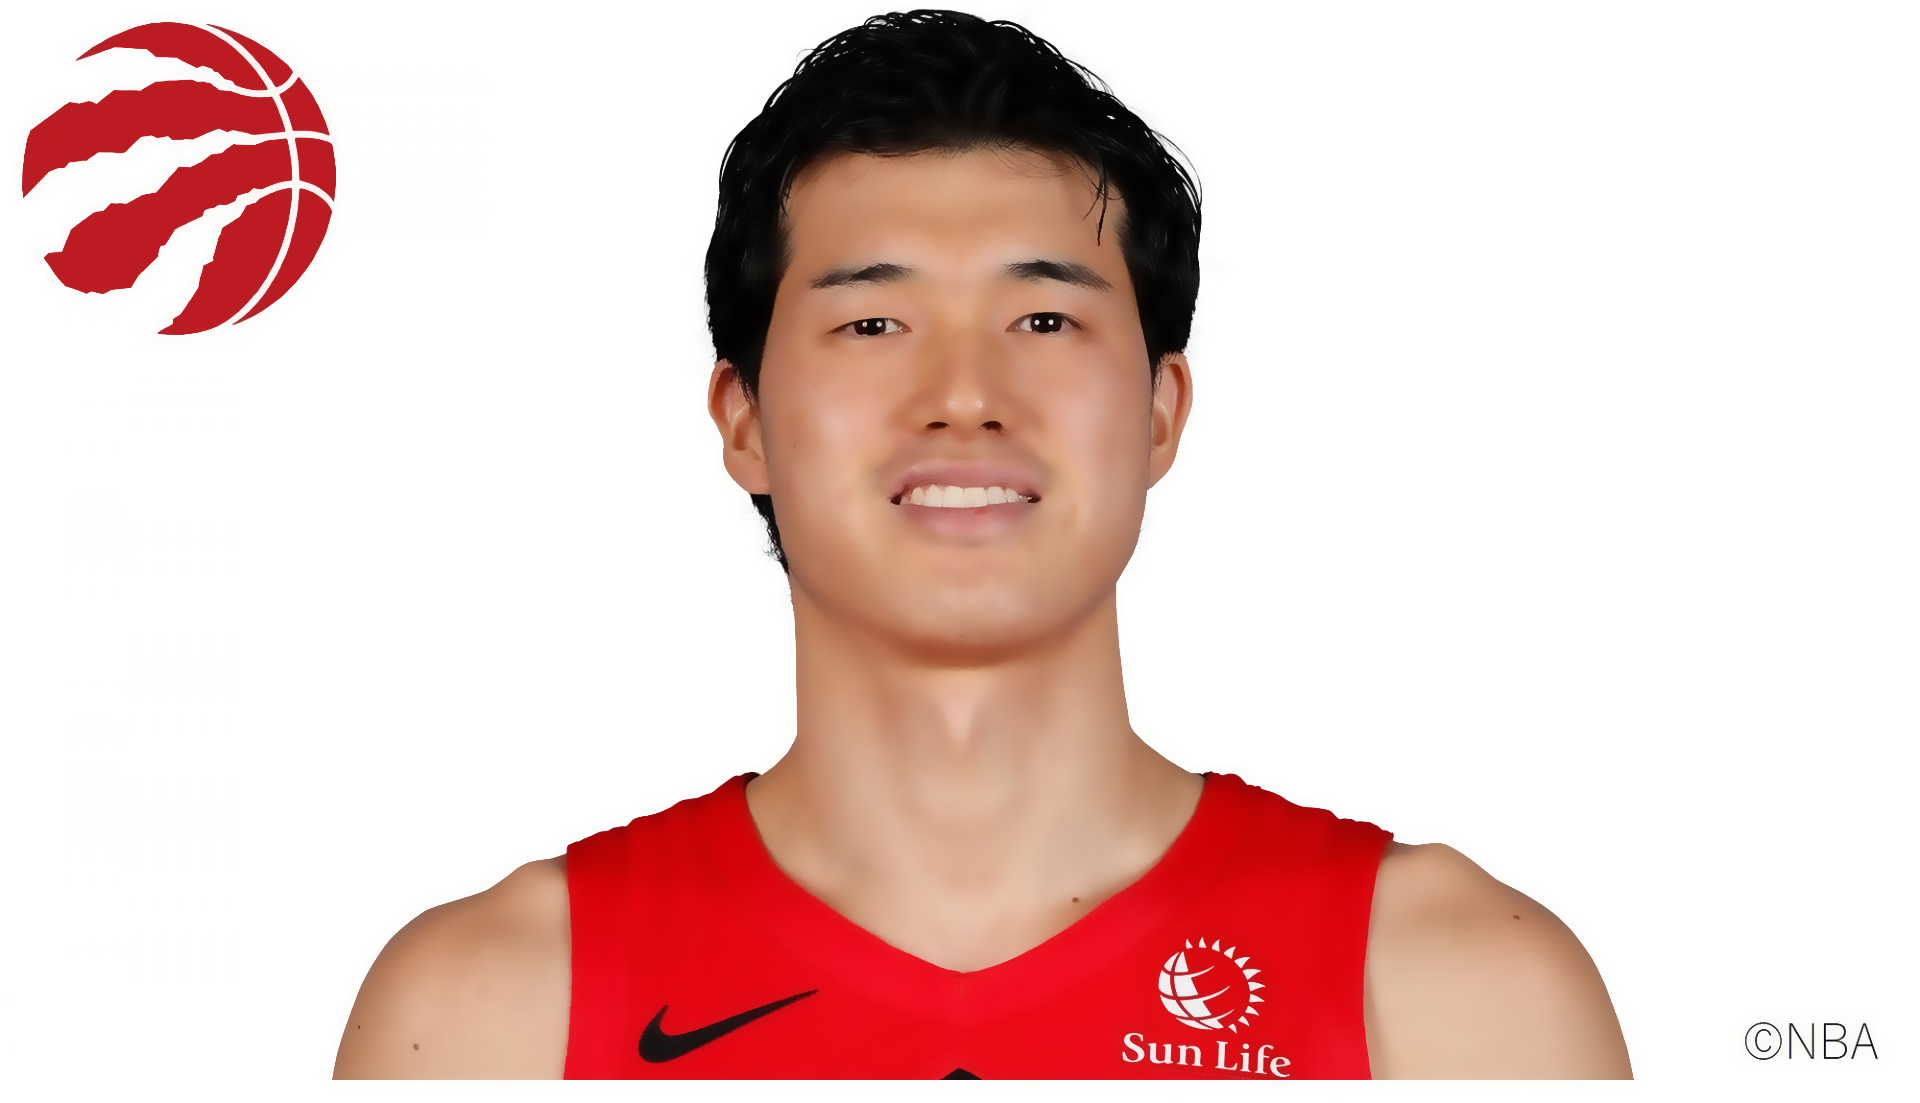

In [4]:
# 人の顔にバイラテラルフィルタ（美肌フィルタ）
img = cv2.imread("./img/watanabe18.jpg", cv2.IMREAD_COLOR) # 画像読み込み
imshow(img)

# cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
#     src: 入力画像
#     d: 注目画素をぼかすために使われる領域
#     sigmaColor: 色についての標準偏差。これが大きいと、画素値の差が大きくても大きな重みが採用される。
#     sigmaSpace: 距離についての標準偏差。これが大きいと、画素間の距離が広くても大きな重みが採用される。

bi = cv2.bilateralFilter(img, 19, 80, 80) # 確かに肌が綺麗になる
imshow(bi)

## 3.Sobel, Laplacian, Canny の3通りの方法でエッジ抽出します．
(余裕のある人は ，Sobel, Laplacian は 最初はopencvの関数を使わないで，3x3フィルタリングによって求めてみましょ う．そして，opencvの関数を使った場合と結果が同じかどうか確認してください．) (参考資料:物体認識論2回目資料)
### Sobelフィルタ

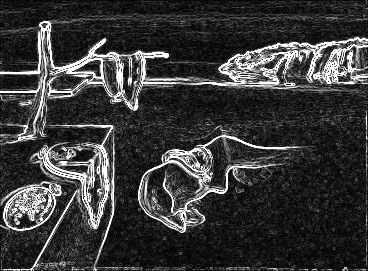

In [5]:
# dst = cv2.Sobel(src, bit, dx, dy, ksize)
    # パラメータ名	説明
    # src	入力画像
    # bit	出力画像のビット深度
    # dx	x方向微分の次数
    # dy	y方向微分の次数
    # ksize	カーネルサイズ
    # dst	出力画像
# 黒から白への変化(画素値の低い値から高い値への変化)は正方向の傾きとして計算されますが，
# 白から黒への変化(画素値の高い値から低い値への変化)は負の傾きとして計算されます．
# 正負両方のエッジを検出する場合は，画素値の型をcv2.CV_16S,cv2.CV_64F といった高次のものに変更

img = cv2.imread("./img/dali.jpg", cv2.IMREAD_COLOR) # 画像読み込み
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # カラーから白黒に変換

gray_x = cv2.Sobel(gray_img, cv2.CV_32F, 1, 0, ksize=3)
gray_y = cv2.Sobel(gray_img, cv2.CV_32F, 0, 1, ksize=3)
sobel = np.sqrt(gray_x ** 2 + gray_y ** 2)

#imshow(gray_x)
#imshow(gray_y)

imshow(sobel)

### Laplacian

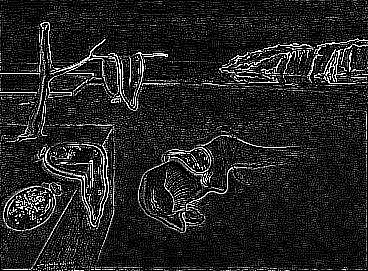

In [6]:
# dst = cv2.Laplacian(src, bit, ksize)
    # パラメータ名	説明
    # src	入力画像
    # bit	出力画像のビット深度
    # ksize	カーネルサイズ
    # dst	出力画像
img = cv2.imread("./img/dali.jpg", cv2.IMREAD_COLOR) # 画像読み込み
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # カラーから白黒に変換

lap = cv2.Laplacian(gray_img, cv2.CV_32F, ksize=3)
imshow(lap)

### Cannyアルゴリズム
#### 特徴
①輪郭の検出漏れや誤検出が少ない。
②各点に一本の輪郭を検出する。
③真にエッジの部分を検出できる。
#### 原理
①	Gaussianフィルタで画像を平滑化する。
②	平滑化された画像の微分を計算する。
③	微分した結果から勾配の大きさと方向の計算する。
④	Non maximum Suppression処理をする。
⑤	Hysteresis Threshold処理をする。

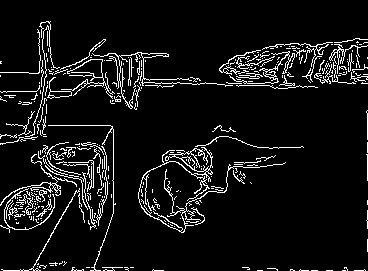

In [7]:
# dst = cv2.Canny(src, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])
    # パラメータ名	説明
    # src	入力画像
    # threshold1	最小閾値（Hysteresis Thresholding処理で使用）
    # threshold2	最大閾値（Hysteresis Thresholding処理で使用）

img = cv2.imread("./img/dali.jpg", cv2.IMREAD_COLOR) # 画像読み込み
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # カラーから白黒に変換

canny = cv2.Canny(gray_img, 100, 200)
imshow(canny)

## 4.エッジ画像に対して Hough 変換を行って，直線(線分)抽出をします． 
normal と probabilistic を試してみてください． ([注意] Hough変換には，動物画像でなくて，直線の多い画像(人工物の多い画像 など)をサンプル画像として利用してください．) (参考資料: 物体認識論2回目資料 P.43-)

In [8]:
# cv2.HoughLines() に2値画像を渡すと、検出された直線の一覧を形状が (NumLines, 1, 2) の ndarray で返します。 
# 各要素は直線のパラメータθ,ρ を表します。

# 2値画像はcanny
lines = cv2.HoughLines(canny, 1, np.pi / 180, 100)
# print(lines)

#### normal

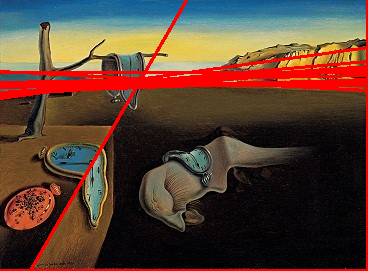

In [9]:
def draw_line(img, theta, rho):
    h, w = img.shape[:2]
    if np.isclose(np.sin(theta), 0):
        x1, y1 = rho, 0
        x2, y2 = rho, h
    else:
        calc_y = lambda x: rho / np.sin(theta) - x * np.cos(theta) / np.sin(theta)
        x1, y1 = 0, calc_y(0)
        x2, y2 = w, calc_y(w)

    # float -> int
    x1, y1, x2, y2 = list(map(int, [x1, y1, x2, y2]))

    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# ノーマル
# 直線を描画する。
if lines is not None:
    for rho, theta in lines.squeeze(axis=1):
        draw_line(img, theta, rho)
imshow(img)

#### probabilistic
OpenCVの実装は，Matas, J. and Galambos, C. and Kittler, J.V.らが提案した漸進的確率的ハフ変換を使ってロバストな直線検出を行います．関数は二つの引数を入力とする cv2.HoughLinesP() です．
<li>minLineLength - 検出する直線の最小の長さを表します．この値より短い線分は検出されません．</li>
<li>maxLineGap - 二つの線分を一つの直線とみなす時に許容される最大の長さを表します．この値より小さいギャップを持つ２本の直線は一つの直線とみなされます．</li>
最良の方法は直線の両端点を返すことです．前の例では直線のパラメータを取得したため，直線上の全点を計算する必要がありました．今回は全てが直接的で単純です．

[[[180  83 191  83]]

 [[228  83 241  83]]

 [[206  83 216  83]]

 [[239  75 249  75]]

 [[ 53 230  60 218]]

 [[  3 270  19 270]]

 [[367 139 367 113]]

 [[ 71  72  89  72]]

 [[150  79 176  79]]

 [[247  83 264  83]]

 [[239  85 269  85]]]


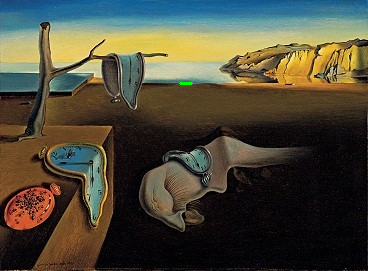

In [10]:
img = cv2.imread("./img/dali.jpg", cv2.IMREAD_COLOR) # 画像読み込み
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # カラーから白黒に変換

canny = cv2.Canny(gray_img, 100, 200)
# imshow(canny)

minLineLength = 100
maxLineGap = 10

lines2 = cv2.HoughLinesP(canny,1,np.pi/180,100,minLineLength,maxLineGap)
print(lines2)
for x1,y1,x2,y2 in lines2[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
imshow(img)

## 5.輪郭線抽出
OpenCV Snake関数の利用によるエッジ画像に対するSnake のサンプル の実行。 (参考資料:大学院講義 P.35-) Python OpenCV snakeの解説ブログやC++ Snakeもどうぞ．以下，pythonリファレンスから摘記．
### SnakeImage(image, points, alpha, beta, gamma, win, criteria, calc_gradient=1) → new_points
そのエネルギーが最小となるように輪郭位置を変更します．
#### パラメタ:	
<li>image (IplImage) – 入力画像，あるいは外部エネルギー場．</li>
<li>points (CvPoints) – 輪郭点 (snake)．</li>
<li>alpha (sequence of float) – 連続エネルギーの重み．1つの浮動小数点数，あるいは浮動小数点数リスト．後者の場合，1つの要素が1つの輪郭点に対応します．</li>
<li>beta (sequence of float) – 曲率エネルギーの重み． alpha と同様．</li>
<li>gamma (sequence of float) – 画像エネルギーの重み． alpha と同様．</li>
<li>win (CvSize) – 最小値探索に用いられる各輪郭点の近傍領域サイズ． win.width および win.height は奇数のみ</li>
<li>criteria (CvTermCriteria) – 停止基準．</li>
<li>calc_gradient (int) – 勾配フラグ．0以外の場合，この関数は，各画像ピクセルに対する勾配の強さを計算し，それをエネルギー場として扱います．そうでない場合，入力画像はそのまま扱われます．</li>

#### cv::CreateImageHeader
http://opencv.jp/opencv-2.1/c/operations_on_arrays.html

#### ネットに載っていた対策．実行して良いのか不明．
!pip uninstall opencv-python
!pip install opencv-python

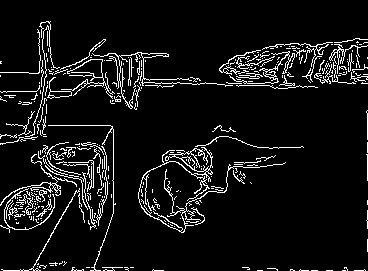

ModuleNotFoundError: No module named 'cv2.cv'

In [17]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

img = cv2.imread("./img/dali.jpg", cv2.IMREAD_COLOR) # 画像読み込み
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # カラーから白黒に変換

# エッジ画像 = 2値画像はcanny
canny = cv2.Canny(gray_img, 100, 200)
imshow(canny)

# Snakeをサンプルから
# IplImage は　Intel Image Processing Library
import cv2.cv as cv

img = canny
h,w = img.shape[:2]
length = 60;
center_x = w/2
center_y = h/2
channel = 3

src = canny
iplimg = cv.CreateImageHeader((src.shape[1], src.shape[0]), cv.IPL_DEPTH_8U, channel)
cv.SetData(iplimg, src.tostring(), src.dtype.itemsize * channel * src.shape[1])

iplimgGray = cv.CreateImage((w,h),cv.IPL_DEPTH_8U,1)
cv.CvtColor(iplimg,iplimgGray,cv.CV_BGR2GRAY)

cv2.imshow('original',src)

pts = []

for i in range(length):
    pts.append((int(center_x * math.cos(2*math.pi*i/length)+center_x),int(center_y*math.sin(2*math.pi*i/length)+center_y)))


cp = cv.SnakeImage(iplimgGray,tuple(pts),0.45,0.35,0.2,(15,15),(cv.CV_TERMCRIT_ITER,10,0))


for j in range(15):
    cp = cv.SnakeImage(iplimgGray,cp,0.45,0.35,0.2,(15,15),(cv.CV_TERMCRIT_ITER,10,0))
    ncp = np.asarray(cp)
    gray = np.zeros((w, h, 3), dtype='uint8')
    cv2.polylines(gray,[ncp],1,(255,255,255))
    cv2.imshow('SnakeImage',gray)
    cv2.waitKey()

cv2.waitKey()
cv2.destroyAllWindows()
